Author: <a href = "https://github.com/Sumanth2905">Sumanth K</a>
<br>ID: GO_STP_11068


Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset is downloaded from Kaggle.

 Link: https://www.kaggle.com/giripujar/hr-analytics

First do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using Machine Learning & Python.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.info()

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


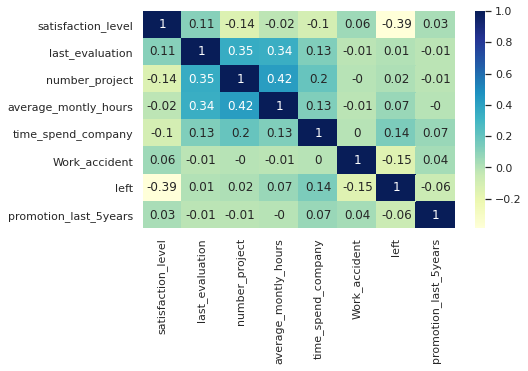

In [ ]:
sns.set(rc={'figure.figsize':(7,4)})
corrmat= df.corr().round(2)
sns.heatmap(data=corrmat, annot=True, cmap="YlGnBu")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


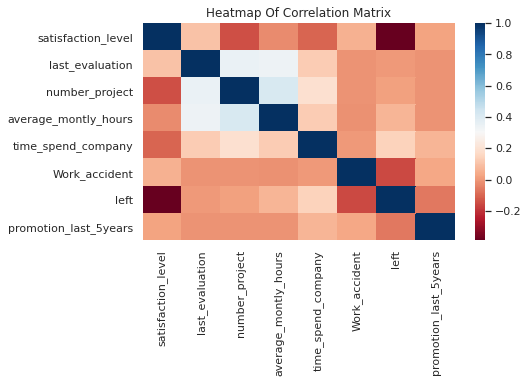

In [10]:
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="RdBu")
plt.title("Heatmap Of Correlation Matrix")
corr

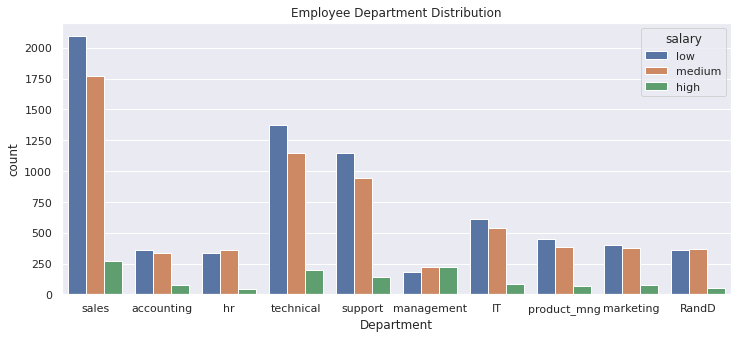

In [18]:
sns.countplot(x='Department', data=df,hue='salary').set_title("Employee Department Distribution");
sns.set(rc={'figure.figsize':(12,5)})
#plt.plot()

In [19]:
data= df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [20]:
salary= pd.get_dummies(data['salary'], prefix='salary')
salary

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [21]:

new_df= pd.concat([data,salary], axis=1)
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [22]:
# droping a column to avoid dummy variable trap
new_df.drop(['salary','salary_high'], axis=1, inplace=True)
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [23]:
X= new_df
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [24]:
Y=df['left']
Y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y= train_test_split(X,Y, test_size=0.30, random_state=5)


In [26]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(train_X,train_Y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred= lr.predict(test_X)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

accuracy_score(test_Y,y_pred)

0.766

In [29]:
confusion_matrix(test_Y,y_pred)

array([[3176,  235],
       [ 818,  271]])

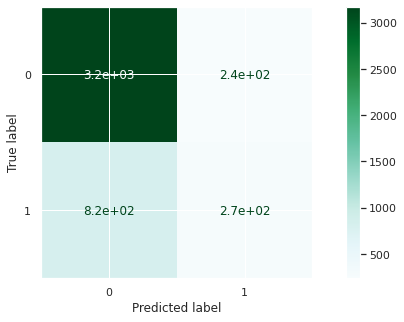

In [34]:
plot_confusion_matrix(lr,test_X,test_Y,cmap=plt.cm.BuGn)